# Summary:
The given dataset gives the information about the population who are location in different suburbs of Boston and in whta type of houses that they are staying. By using this dataset we need to train the dataset and determine the life style of the people who are living in the regions of Boston.

## Load the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
np.mean([1,2,3,4])

2.5

## Load the dataset

In [3]:
train = pd.read_csv("train.csv")

## Understand the dataset

In [4]:
train.shape

(333, 15)

###**Dataset is obtainded from:**


*   https://www.kaggle.com/c/boston-housing/overview
*   https://colab.research.google.com/

**Data set description**

The Boston data frame has 506 rows and 14 columns.<br> <br>

***This data frame contains the following columns:***


*   <b>crim:</b> per capita crime rate by town.<br>
*   <b>zn:</b>proportion of residential land zoned for lots over 25,000 sq.ft.<br>
*   <b>indus:</b>proportion of non-retail business acres per town.<br>
*   <b>chas:</b>Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).<br>
*   <b>nox:</b>nitrogen oxides concentration (parts per 10 million).<br>
*   <b>rm:</b>average number of rooms per dwelling.<br>
*   <b>age:</b>proportion of owner-occupied units built prior to 1940.<br>
*   <b>dis:</b>weighted mean of distances to five Boston employment centres.<br>

*   <b>rad:</b>index of accessibility to radial highways.<br>
*   <b>tax:</b>full-value property-tax rate per \$10,000.<br>
*   <b>ptratio:</b>pupil-teacher ratio by town.<br>
*   <b>black:</b>1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.<br>
*   <b>lstat:</b>lower status of the population (percent).<br>
*   <b>medv:</b>median value of owner-occupied homes in \$1000s.<br>


In [5]:
train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [7]:
train.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [8]:
train.shape

(333, 15)

In [9]:
train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


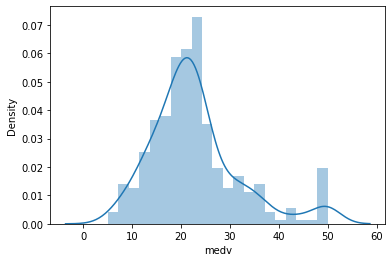

In [10]:
sns.distplot(train["medv"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


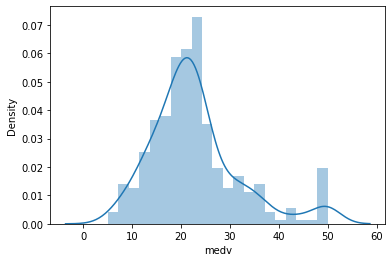

In [11]:
sns.distplot(train["medv"]);

# Modeling

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [14]:
train.drop("ID",axis=1, inplace=True)

In [15]:
train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [17]:
X_train,X_val,y_train, y_val = train_test_split(
    train.drop("medv", axis=1), train["medv"], test_size=0.2)

In [18]:
X_train.shape, X_val.shape

((266, 13), (67, 13))

In [19]:
y_train.shape, y_val.shape

((266,), (67,))

In [20]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
57,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
36,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77
47,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305,19.2,383.73,6.72
150,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307,17.4,395.24,21.46
161,0.44791,0.0,6.20,1,0.507,6.726,66.5,3.6519,8,307,17.4,360.20,8.05


In [21]:
X_val.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
222,0.03427,0.0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
177,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264,13.0,393.42,11.25
172,0.21409,22.0,5.86,0,0.431,6.438,8.9,7.3967,7,330,19.1,377.07,3.59
35,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81
49,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305,19.2,377.17,7.54


# Model building

### Two Machine learning algorithms were used for training the datasets

# 1. Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
model = DecisionTreeRegressor()

In [24]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
y_pred = model.predict(X_val)

In [26]:
y_pred

array([19. , 33.8, 24.6, 32.9, 23.3, 15.2, 15.2, 23. , 50. , 17.8, 20.1,
       36.2, 28. , 25. , 19.9, 17.1, 10.9,  5. , 12.6, 26.2, 23.8,  8.1,
       19.1, 15.2, 24.1, 24.4, 33.8,  8.1, 22.2, 19. , 25. , 20.4, 20.8,
       28.7, 32.4, 28.1, 22.1, 17.1, 21.4, 17.8, 36.2, 23.3, 12.7, 29.9,
       15.2, 23.1, 50. , 20.6, 50. , 32.5, 19.3, 22.2, 36.1,  5.6, 24.4,
       21.7, 18.3, 10.9, 13.8, 14.9, 17.8, 23.1, 12.7, 33.8, 23.1, 10.9,
       27.1])

In [27]:
y_val.values

array([19.5, 31. , 24.8, 35.4, 23.4, 15.6, 18.4, 21.4, 48.3, 23.2, 19.6,
       33.4, 28.5, 27. , 20.6, 17.4, 10.5,  7. , 20.1, 23.9, 24.7, 13.6,
       19.8, 16.4, 22.6, 20.3, 36.5, 15.2, 26.4, 18.7, 26.6, 17.5, 21.7,
       23.6, 35.1, 24.4, 20.4, 14.1, 25. , 14.6, 37.2, 24.5,  9.7, 32. ,
       12.5, 21.4, 46. , 21.8, 27.9, 24. , 19.8, 23.4, 35.4, 10.4, 22.6,
       23.1, 18.7,  8.3, 13.8, 13.5, 13.1, 20.7, 14.8, 30.7, 21.4,  8.8,
       22. ])

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
np.sqrt(mean_squared_error(y_val, y_pred))

4.011122595684648

In [30]:
r2_score(y_val, y_pred)

0.7659134262009109

In [31]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [32]:
tree_graph_to_png(tree=model, feature_names=X_train.columns,
                  png_file_to_save='tree1.png')

In [33]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
57,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
36,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77
47,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305,19.2,383.73,6.72
150,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307,17.4,395.24,21.46
161,0.44791,0.0,6.20,1,0.507,6.726,66.5,3.6519,8,307,17.4,360.20,8.05


In [34]:
y_train

57     23.9
36     24.7
47     24.2
150    21.7
161    29.0
       ... 
22     30.8
162    24.0
316    23.0
191    22.0
252    12.3
Name: medv, Length: 266, dtype: float64

# 2. RandomForest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [37]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, max_features= 0.5 )

In [38]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
y_pred = model.predict(X_val)

In [41]:
y_pred

array([22.14142595, 29.23863588, 27.3821412 , 34.04614323, 23.40485088,
       16.50551692, 15.93671463, 20.27296951, 42.77852551, 16.52530471,
       19.30119666, 35.62988683, 30.94618611, 26.03468051, 23.09780972,
       17.21001728, 10.32886898,  8.95962824, 17.79329322, 27.25295336,
       23.70674147, 15.8783364 , 19.85509521, 17.16105063, 23.74148641,
       20.60031833, 35.48188542, 16.29330483, 23.50801835, 23.03716708,
       26.32766606, 19.74084337, 20.39539608, 33.19538648, 31.06583782,
       23.97306499, 22.05807857, 14.80441446, 23.52446999, 16.44947369,
       33.60215096, 23.33533589, 10.7863975 , 28.32993056, 15.0086231 ,
       22.14274164, 44.70458366, 20.65942057, 25.04942112, 27.54017235,
       19.62723962, 23.01220794, 34.91152888,  9.2312559 , 21.19280126,
       20.58625143, 20.59871089, 10.53419752, 16.30334508, 15.58241014,
       17.06307448, 23.75554371, 17.45003231, 28.17976728, 18.55074606,
        9.7652835 , 25.63054764])

In [42]:
y_val.values

array([19.5, 31. , 24.8, 35.4, 23.4, 15.6, 18.4, 21.4, 48.3, 23.2, 19.6,
       33.4, 28.5, 27. , 20.6, 17.4, 10.5,  7. , 20.1, 23.9, 24.7, 13.6,
       19.8, 16.4, 22.6, 20.3, 36.5, 15.2, 26.4, 18.7, 26.6, 17.5, 21.7,
       23.6, 35.1, 24.4, 20.4, 14.1, 25. , 14.6, 37.2, 24.5,  9.7, 32. ,
       12.5, 21.4, 46. , 21.8, 27.9, 24. , 19.8, 23.4, 35.4, 10.4, 22.6,
       23.1, 18.7,  8.3, 13.8, 13.5, 13.1, 20.7, 14.8, 30.7, 21.4,  8.8,
       22. ])

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
np.sqrt(mean_squared_error(y_val, y_pred))

2.5960756099660713

In [ ]:
r2_score(y_val, y_pred)

In [48]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)      

In [50]:
feature_importances

,importance
lstat,0.373377
rm,0.319113
dis,0.067565
crim,0.064458
ptratio,0.040448
indus,0.038957
nox,0.032478
age,0.029340
tax,0.016363
black,0.009386


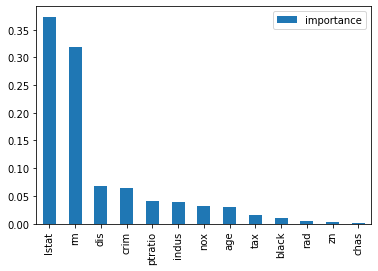

In [51]:
feature_importances.plot(kind ='bar')

# Feature importances
###  Dendogram for redundant features

In [53]:
from scipy.cluster import hierarchy as hc

In [54]:
import scipy

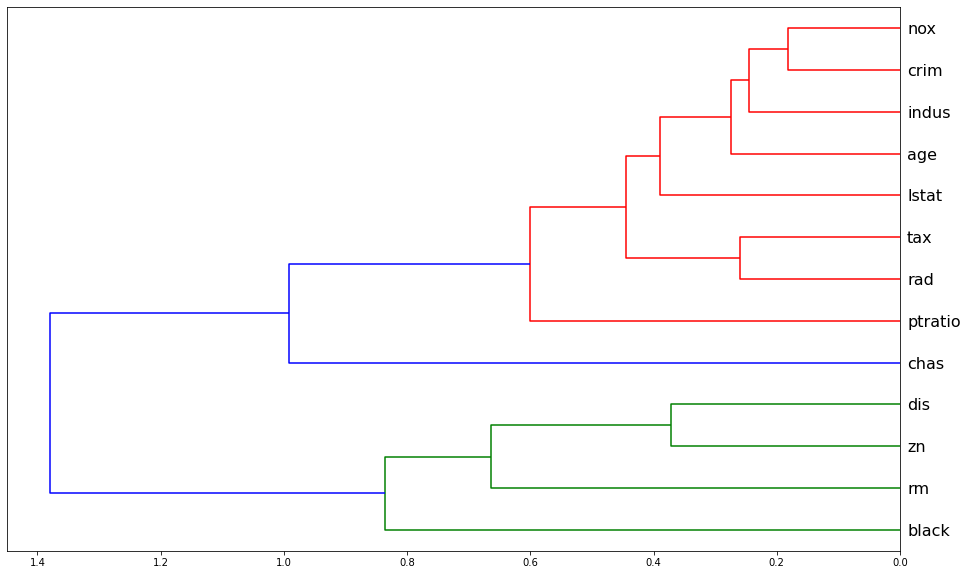

In [55]:
corr = np.round(scipy.stats.spearmanr(X_train).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_train.columns, orientation='left', leaf_font_size=16)
plt.show()

### Based on the analysis It is clear that istat has huge connections with other columns of the dataset and so it clear that the huge population of people in Boston are in lower status. 